In [4]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os


In [5]:
# Data Merging
#import the modules

# Directory containing CSV files
input_directory = ("../Project_1/Resources_Input")
# Output file path
output_file = ("../Project_1/Resources_Output/Crypto_merged.csv")

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]

# List to hold DataFrames
dataframes = []

# Read each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(input_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the combined DataFrame to a new CSV file
merged_df.to_csv(output_file, index=False)

In [6]:
# Data Cleaning
merged_df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [7]:
target_symbols = ['BTC', 'ETH', 'ADA','BNB','XRP','SOL','DOGE']

filtered_df=merged_df[merged_df['Symbol'].isin(target_symbols)]
filtered_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
275,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
276,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
277,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
278,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
279,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [8]:
# filtered_df.reset_index(drop=True,inplace=True)

In [9]:
filtered_df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [10]:
#filtered_df.info()

In [11]:
# filtered_df['Date'].value_counts().sort_values()

In [12]:
# filtered_df.loc[filtered_df['Date']==0]

In [13]:
# Filter Doge coin data set

DOGE_df=filtered_df[filtered_df['Symbol'] == 'DOGE'].reset_index()

DOGE_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,9247,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,9248,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,9249,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,9250,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,9251,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...,...
2755,12002,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,12003,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,12004,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,12005,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


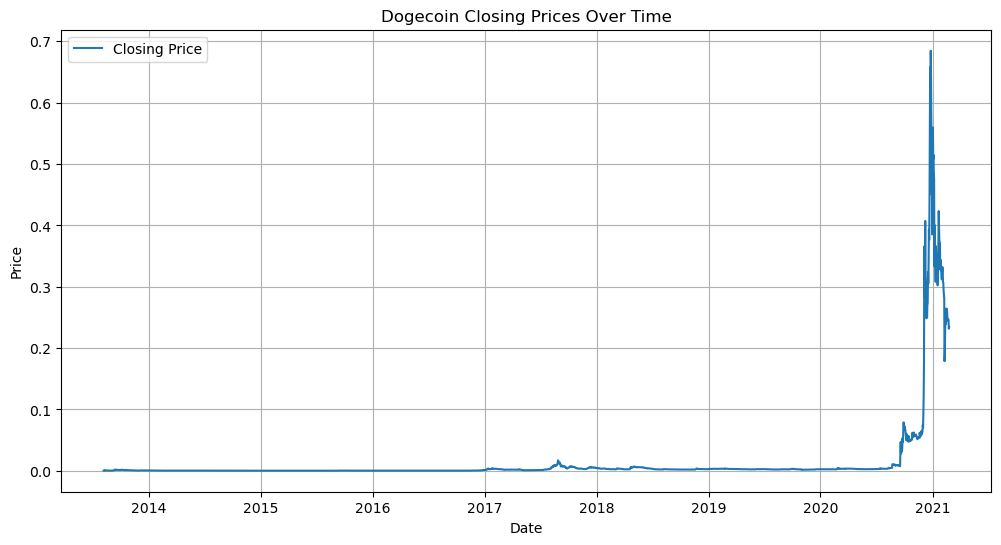

In [14]:
# Convert date column to datetime
DOGE_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
DOGE_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(DOGE_df['Close'], label='Closing Price')
plt.title('Dogecoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Filter Etherum data set

ETH_df=filtered_df[filtered_df['Symbol'] == 'ETH'].reset_index()

ETH_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,13473,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,13474,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,13475,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,13476,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,13477,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...
2155,15628,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,15629,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,15630,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,15631,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


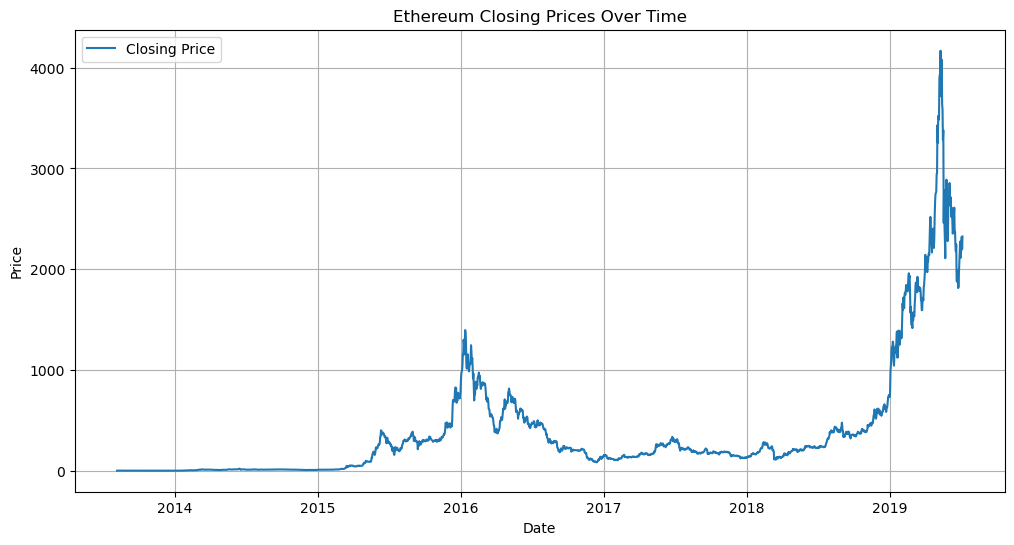

In [16]:
# Convert date column to datetime
ETH_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ETH_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ETH_df['Close'], label='Closing Price')
plt.title('Ethereum Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Filter Solana data set

SOL_df=filtered_df[filtered_df['Symbol'] == 'SOL'].reset_index()

SOL_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,25318,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00
1,25319,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
2,25320,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00
3,25321,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00
4,25322,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
447,25765,448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09
448,25766,449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09
449,25767,450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09
450,25768,451,Solana,SOL,2021-07-05 23:59:59,34.461824,32.482692,34.282550,32.984588,3.138393e+08,8.992833e+09


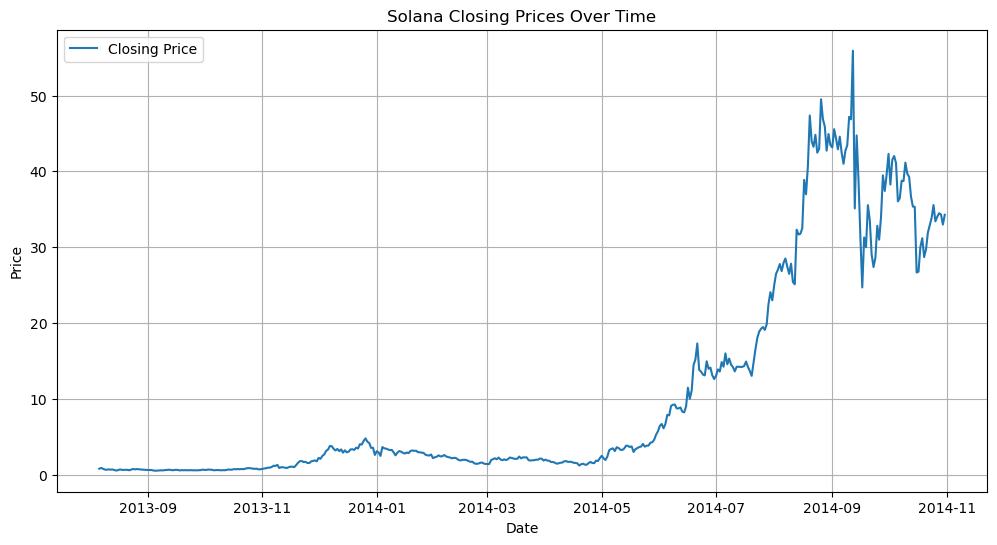

In [18]:
# Convert date column to datetime
SOL_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
SOL_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(SOL_df['Close'], label='Closing Price')
plt.title('Solana Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Filter Binance data set
BNB_df=filtered_df[filtered_df['Symbol'] == 'BNB'].reset_index()

BNB_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,275,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,276,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,277,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,278,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,279,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...,...
1437,1712,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1438,1713,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1439,1714,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1440,1715,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


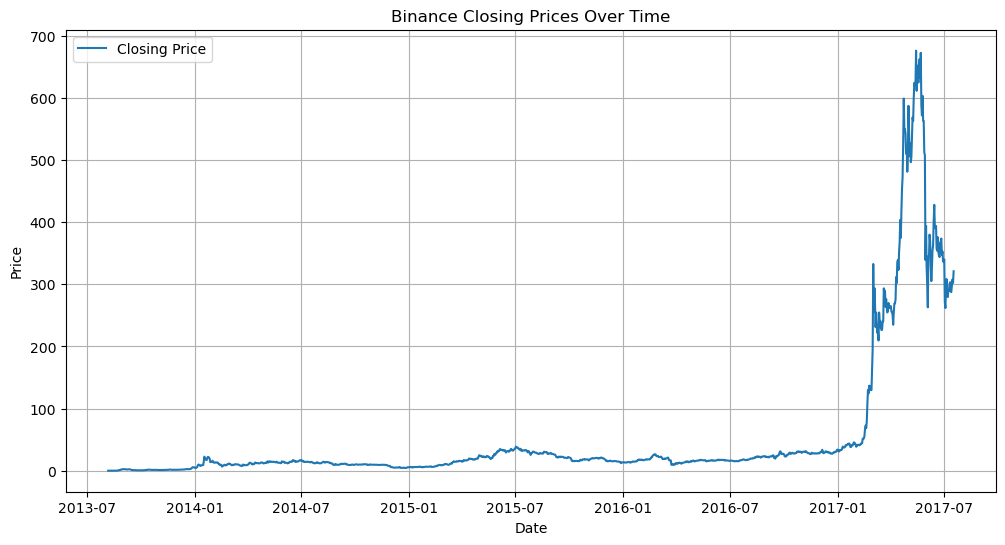

In [28]:
# Convert date column to datetime
BNB_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BNB_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BNB_df['Close'], label='Closing Price')
plt.title('Binance Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Filter Binance data set
BTC_df=filtered_df[filtered_df['Symbol'] == 'BNB'].reset_index()

BTC_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,275,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,276,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,277,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,278,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,279,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...,...
1437,1712,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1438,1713,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1439,1714,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1440,1715,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


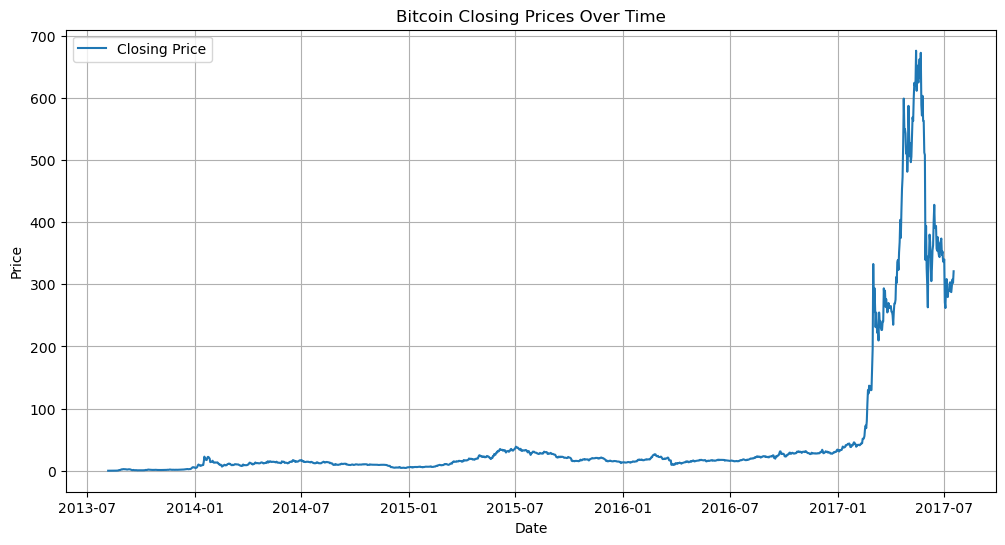

In [30]:
# Convert date column to datetime
BTC_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BTC_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BTC_df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Statistical functions  Mean, Median and Volatility compare few cyrpto (4-5)

In [22]:
# Correlation between trading volume and price movements

In [23]:
# Quant & Qual factors impacting cryptocurrency prices

In [24]:
# Change in Trading volume

In [25]:
# Charts and graphs

In [26]:
# Bonus # External event API